## Here we generate the immutable gene embeddings

Note: These are not the embeddings of expression data, expression is given directly as raw count to scPRINT for more information about dataloading, see [scDataLoader](https://www.github.com/jkobject/scdataloader) 

In [ ]:
from scprint.tokenizers import protein_embeddings_generator
# from RNABERT import RNABERT

from scdataloader.utils import load_genes
import pandas as pd

%load_ext autoreload
%autoreload 2


→ connected lamindb: jkobject/scprint_v2


/home/ml4ig1/Documents code/scPRINT/.venv/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/home/ml4ig1/Documents code/simpler_flash/src/simpler_flash/layer_norm.py:1044: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/ml4ig1/Documents code/simpler_flash/src/simpler_flash/layer_norm.py:1107: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd


# human

In [2]:
hgenedf = load_genes(organisms="NCBITaxon:9606")
hgenedf

,uid,symbol,ncbi_gene_ids,biotype,synonyms,description,organism_id,mt,ribo,hb,organism
ensembl_gene_id,,,,,,,,,,,
ENSG00000000003,1uTi9dROoaN5,TSPAN6,7105,protein_coding,TSPAN-6|T245|TM4SF6,tetraspanin 6,4,False,False,False,NCBITaxon:9606
ENSG00000000005,2FhduD7Z97Uv,TNMD,64102,protein_coding,TEM|MYODULIN|CHM1L|TENDIN|BRICD4,tenomodulin,4,False,False,False,NCBITaxon:9606
ENSG00000000419,4eC1wUNJAO2s,DPM1,8813,protein_coding,CDGIE|MPDS,dolichyl-phosphate mannosyltransferase subunit...,4,False,False,False,NCBITaxon:9606
ENSG00000000457,5Zug63FETk4p,SCYL3,57147,protein_coding,PACE1|PACE-1,SCY1 like pseudokinase 3,4,False,False,False,NCBITaxon:9606
ENSG00000000460,3wEqb6eOTZzC,FIRRM,55732,protein_coding,C1ORF112|FLJ10706|APOLO1|FLIP|MEICA1,FIGNL1 interacting regulator of recombination ...,4,False,False,False,NCBITaxon:9606
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000293596,42lwxhgTHxaN,None,105372654,lncRNA,,novel transcript,4,False,False,False,NCBITaxon:9606
ENSG00000293597,12nPu7ce9hLZ,LINC00970,101978719,lncRNA,,long intergenic non-protein coding RNA 970,4,False,False,False,NCBITaxon:9606
ENSG00000293599,2DLKDsGV0zX9,None,,lncRNA,,novel transcript,4,False,False,False,NCBITaxon:9606


In [ ]:
# rm -r "/tmp/data/fasta/" # if you want to cleanup the temp dir

In [ ]:
homo_emb, naming_df = protein_embeddings_generator(
    hgenedf,
    organism="homo_sapiens",
    cache=False,
    embedder="esm3",
    embedding_size=1152,
    fasta_path="/tmp/data/fasta/",
)
homo_emb.to_parquet("homo_emb.parquet")

18017  genes had duplicates
dropped 112 weird sequences


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

23122it [18:23, 20.95it/s]


In [ ]:
homo_emb, naming_df = protein_embeddings_generator(
    hgenedf,
    organism="homo_sapiens",
    cache=False,
    embedder="esm2",
    embedding_size=1152,
    fasta_path="/tmp/data/fasta/",
)
homo_emb.to_parquet("homo_emb_2.parquet")

# mouse

In [10]:
mgenedf = load_genes(organisms="NCBITaxon:10090")

In [ ]:
# rm -r "/tmp/data/fasta/"
mus_emb, naming_df = protein_embeddings_generator(
    mgenedf,
    organism="mus_musculus",
    cache=False,
    embedder="esm3",
    embedding_size=1152,
    fasta_path="/tmp/data/fasta/",
)
mus_emb.to_parquet("mouse_emb.parquet")

/home/ml4ig1/Documents code/scPRINT/scprint/loaders/embedder.py:39: ResourceWarning: unclosed file <_io.BufferedReader name=107>
  utils.utils.run_command(["gunzip", fasta_path + fasta_file])


15073  genes had duplicates
dropped 97 weird sequences
running protbert
b'Transferred model to GPU'
b'Read /tmp/data/fasta/subset.fa with 21607 sequences'
b'Processing 1 of 2950 batches (117 sequences)'
b'Processing 2 of 2950 batches (89 sequences)'
b'Processing 3 of 2950 batches (78 sequences)'
b'Processing 4 of 2950 batches (71 sequences)'
b'Processing 5 of 2950 batches (67 sequences)'
b'Processing 6 of 2950 batches (63 sequences)'
b'Processing 7 of 2950 batches (59 sequences)'
b'Processing 8 of 2950 batches (57 sequences)'
b'Processing 9 of 2950 batches (55 sequences)'
b'Processing 10 of 2950 batches (53 sequences)'
b'Processing 11 of 2950 batches (52 sequences)'
b'Processing 12 of 2950 batches (51 sequences)'
b'Processing 13 of 2950 batches (49 sequences)'
b'Processing 14 of 2950 batches (48 sequences)'
b'Processing 15 of 2950 batches (47 sequences)'
b'Processing 16 of 2950 batches (46 sequences)'
b'Processing 17 of 2950 batches (46 sequences)'
b'Processing 18 of 2950 batches (45 s

/home/ml4ig1/Documents code/scPRINT/scprint/loaders/protein_embedder.py:54: ResourceWarning: unclosed file <_io.BufferedReader name=107>
  run_command(cmd, shell=True)
/home/ml4ig1/Documents code/scPRINT/scprint/loaders/embedder.py:53: ResourceWarning: unclosed file <_io.BufferedReader name=107>
  utils.utils.run_command(["gzip", fasta_path + fasta_file[:-3]])


In [7]:
gene_emb = pd.concat([mus_emb, homo_emb])
gene_emb.to_parquet("../data/main/gene_embeddings.parquet")

# other

In [2]:
import bionty as bt
import lamindb as ln

→ connected lamindb: jkobject/scprint2


In [ ]:
bt.base.display_available_sources().loc["Organism"]

,source,organism,version,url,md5,source_name,source_website
entity,,,,,,,
Organism,ensembl,vertebrates,release-112,https://ftp.ensembl.org/pub/release-112/specie...,0ec37e77f4bc2d0b0b47c6c62b9f122d,Ensembl,https://www.ensembl.org
Organism,ensembl,vertebrates,release-111,https://ftp.ensembl.org/pub/release-111/specie...,2846df83899eaa61f8043db4c036e883,Ensembl,https://www.ensembl.org
Organism,ensembl,vertebrates,release-110,https://ftp.ensembl.org/pub/release-110/specie...,f3faf95648d3a2b50fd3625456739706,Ensembl,https://www.ensembl.org
Organism,ensembl,vertebrates,release-109,https://ftp.ensembl.org/pub/release-109/specie...,7595bb989f5fec07eaca5e2138f67bd4,Ensembl,https://www.ensembl.org
Organism,ensembl,vertebrates,release-108,https://ftp.ensembl.org/pub/release-108/specie...,d97c1ee302e4072f5f5c7850eff0b642,Ensembl,https://www.ensembl.org
Organism,ensembl,bacteria,release-57,https://ftp.ensemblgenomes.ebi.ac.uk/pub/bacte...,ee28510ed5586ea7ab4495717c96efc8,Ensembl,https://www.ensembl.org
Organism,ensembl,fungi,release-57,http://ftp.ensemblgenomes.org/pub/fungi/releas...,dbcde58f4396ab8b2480f7fe9f83df8a,Ensembl,https://www.ensembl.org
Organism,ensembl,metazoa,release-57,http://ftp.ensemblgenomes.org/pub/metazoa/rele...,424636a574fec078a61cbdddb05f9132,Ensembl,https://www.ensembl.org
Organism,ensembl,plants,release-57,https://ftp.ensemblgenomes.ebi.ac.uk/pub/plant...,eadaa1f3e527e4c3940c90c7fa5c8bf4,Ensembl,https://www.ensembl.org


In [16]:
bt.Organism.public("all").df().index

Index(['root', 'cellvibrio', 'ancylobacter aquaticus',
       'herbaspirillum sp. ba12', 'microbacterium sp. 6.11-vpa',
       'callipharixenos sp. dpm-2011', 'paraxenos', 'paraxenos sp. dpm-2011',
       'blissoxenos', 'blissoxenos esakii',
       ...
       'subspecies', 'subtribe', 'superclass', 'superfamily', 'superkingdom',
       'superorder', 'superphylum', 'taxonomic rank', 'tribe', 'varietas'],
      dtype='object', name='name', length=2511800)

In [19]:
bt.Organism.from_source(name="caenorhabditis_elegans", source=source)

! did not create Organism record for 1 non-validated name: 'caenorhabditis_elegans'


In [ ]:
source = bt.PublicSource.filter(name="ensembl", organism="all").last()

In [ ]:
records = []
for organism_clade in ["vertebrates", "plants"]:
    names = bt.Organism.public(organism=organism_clade).df().index
    source = bt.PublicSource.filter(name="ensembl", organism=organism_clade).last()
    records += [bt.Organism.from_source(name=name, source=source) for name in names]
nrecords = []
prevrec = set()
for rec in records:
    if rec is None:
        continue
    if not isinstance(rec, bt.Organism):
        rec = rec[0]
    if rec.uid not in prevrec:
        nrecords.append(rec)
        prevrec.add(rec.uid)
ln.save(nrecords)
bt.Organism(name="unknown", ontology_id="unknown").save()

! did not create Organism record for 1 non-validated name: 'caenorhabditis elegans (nematode, n2)'
! did not create Organism record for 1 non-validated name: 'panamanian white-faced capuchin'
! did not create Organism record for 1 non-validated name: 'atlantic herring '
! ambiguous validation in Bionty for 1 record: 'common carp'
! did not create Organism record for 1 non-validated name: 'drosophila melanogaster (fruit fly)'
! did not create Organism record for 1 non-validated name: 'atlantic cod - celtic sea'
! did not create Organism record for 1 non-validated name: 'three-spined sticklebacki - freshwater bot'
! did not create Organism record for 1 non-validated name: 'three-spined sticklebacki - marine bam'
! did not create Organism record for 1 non-validated name: 'three-spined sticklebacki - marine syl'
! did not create Organism record for 1 non-validated name: 'korean mudskipper'
! did not create Organism record for 1 non-validated name: 'rat - shrsp/bbbutx'
! did not create Orga

Organism(uid='5HWRj1OD', name='unknown', ontology_id='unknown', created_by_id=1, space_id=1, created_at=2024-11-25 10:54:58 UTC)

In [ ]:
names = {
    "arabidopsis_thaliana": "NCBITaxon:3702",
    "bos_taurus": "NCBITaxon:9913",
    "caenorhabditis_elegans": "NCBITaxon:6239",
    "callithrix_jacchus": "NCBITaxon:9483",
    "danio_rerio": "NCBITaxon:7955",
    "drosophila_melanogaster": "NCBITaxon:7227",
    "gallus_gallus": "NCBITaxon:9031",
    "heterocephalus_glaber_male": "NCBITaxon:10181",
    "macaca_mulatta": "NCBITaxon:9544",
    "oryctolagus_cuniculus": "NCBITaxon:9986",
    "oryza_sativa": "NCBITaxon:39947",
    "ovis_aries": "NCBITaxon:9940",
    "pan_troglodytes": "NCBITaxon:9598",
    "sus_scrofa": "NCBITaxon:9823",
    "zea_mays": "NCBITaxon:4577",
}

In [ ]:
for i in names.keys():
    if i in ["homo_sapiens", "mus_musculus"]:
        continue
    emb, naming_df = protein_embeddings_generator(
        organism=i, cache=False, embedding_size=1152
    )
    emb.to_parquet(f"{i.split('_')[0]}_emb.parquet")
    naming_df.to_parquet(f"{i.split('_')[0]}_names.parquet")

# Grouping

In [38]:
! mv homo_emb.parquet ../homo_emb.parquet
! mv mouse_emb.parquet ../mouse_emb.parquet


mv: cannot stat 'mouse_emb.parquet': No such file or directory


In [ ]:
files = ! ls ../*_names.parquet
files = [pd.read_parquet(i) for i in files]

In [ ]:
for j, file in enumerate(files):
    file = file[file.biotype == "protein_coding"]
    file = file.drop_duplicates(subset=["name"])
    file = file.rename(columns={"name": "ensembl_gene_id", "gene_symbol": "symbol"})
    file["organism"] = list(names.values())[j]
    file = file.set_index("ensembl_gene_id")
    # IMPORTANT!!!!
    if list(names.keys())[j] == "ovis_aries":
        file.index = [i[:10] + "2" + i[11:] for i in file.index]
    if list(names.keys())[j] == "heterocephalus_glaber":
        file.index = [i[:9] + "0" + i[10:] for i in file.index]
    file.to_parquet(f"../{list(names.keys())[j].split('_')[0]}_names.parquet")

In [73]:
files = ! ls ../*_names.parquet

In [76]:
pd.read_parquet(files)

,biotype,ensembl_id,symbol,description,organism
ensembl_gene_id,,,,,
AT5G16970,protein_coding,AT5G16970.1,AER,alkenal reductase [Source:NCBI gene (formerly ...,NCBITaxon:3702
AT4G32100,protein_coding,AT4G32100.1,AT4G32100,"Beta-1,3-N-Acetylglucosaminyltransferase famil...",NCBITaxon:3702
AT2G43120,protein_coding,AT2G43120.2,AT2G43120,RmlC-like cupins superfamily protein [Source:N...,NCBITaxon:3702
AT1G30814,protein_coding,AT1G30814.1,AT1G30814,uncharacterized protein [Source:NCBI gene (for...,NCBITaxon:3702
AT3G18710,protein_coding,AT3G18710.1,PUB29,plant U-box 29 [Source:NCBI gene (formerly Ent...,NCBITaxon:3702
...,...,...,...,...,...
Zm00001eb324130,protein_coding,Zm00001eb324130_P001,Zm00001eb324130,Zm00001e138564,NCBITaxon:4577
Zm00001eb266420,protein_coding,Zm00001eb266420_P001,Zm00001eb266420,Zm00001e029605,NCBITaxon:4577
Zm00001eb100900,protein_coding,Zm00001eb100900_P001,Zm00001eb100900,Zm00001e009957,NCBITaxon:4577


In [ ]:
emb = protein_embeddings_generator(
    organism="ovis_aries", cache=False, embedding_size=1152
)

> /home/ml4ig1/Documents code/scPRINT/scprint/tokenizers/embedder.py(43)protein_embeddings_generator()
     41 
     42     pdb.set_trace()
---> 43     fasta_path_pep, fasta_path_ncrna = utils.load_fasta_species(
     44         species=organism, output_path=fasta_path, cache=cache
     45     )



gzip: /tmp/data/fasta/Ovis_aries.Oar_v3.1.pep.all.fa already exists;	not overwritten


1843  genes had duplicates
dropped 0 weird sequences


168it [00:06, 27.37it/s]


Program interrupted. (Use 'cont' to resume).
> /home/ml4ig1/Documents code/scPRINT/scprint/tokenizers/embedder.py(77)protein_embeddings_generator()
     75                 protein_tensor = client.encode(protein)
     76                 logits_output = client.logits(protein_tensor, conf)
---> 77                 prot_embeddings.append(
     78                     logits_output.embeddings[0].mean(0).cpu().numpy().tolist()
     79                 )

     72         ):
     73             for record in tqdm(SeqIO.parse(fasta, "fasta")):
     74                 protein = ESMProtein(sequence=str(record.seq))
     75                 protein_tensor = client.encode(protein)
     76                 logits_output = client.logits(protein_tensor, conf)
---> 77                 prot_embeddings.append(
     78                     logits_output.embeddings[0].mean(0).cpu().numpy().tolist()
     79                 )
     80                 names.append(record.id)
     81     else:
     82         raise V

168it [00:23, 27.37it/s]

                     name         biotype            ensembl_id  \
0      ENSOARG00000000006  protein_coding  ENSOARP00000000001.1   
1      ENSOARG00000000010  protein_coding  ENSOARP00000000002.1   
2      ENSOARG00000000016  protein_coding  ENSOARP00000000003.1   
3      ENSOARG00000000019  protein_coding  ENSOARP00000000004.1   
4      ENSOARG00000000021  protein_coding  ENSOARP00000000005.1   
...                   ...             ...                   ...   
22818  ENSOARG00000025194  protein_coding  ENSOARP00000022820.1   
22819  ENSOARG00000025195  protein_coding  ENSOARP00000022821.1   
22820  ENSOARG00000025196  protein_coding  ENSOARP00000022822.1   
22821  ENSOARG00000025197  protein_coding  ENSOARP00000022823.1   
22822  ENSOARG00000025198  protein_coding  ENSOARP00000022824.1   

              gene_symbol                                        description  
0                     ND1  NADH dehydrogenase subunit 1 [Source:NCBI gene...  
1                     ND2  NADH dehyd

1661it [02:39, 26.70it/s]

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="macaca_mulatta", cache=False, embedding_size=1152
)
emb.to_parquet("macaca_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="pan_troglodytes", cache=False, embedding_size=1152
)
emb.to_parquet("pan_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="oryza_sativa", cache=False, embedding_size=1152
)
emb.to_parquet("oryza_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="schistosoma_mansoni", cache=False, embedding_size=1152
)
emb.to_parquet("schistosoma_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

In [ ]:
emb = protein_embeddings_generator(
    mgenedf, organism="ovis_aries", cache=False, embedding_size=1152
)
emb.to_parquet("ovis_emb.parquet")

# plot

In [4]:
da = pd.read_parquet("../data/main/gene_embeddings.parquet")

In [7]:
is_hum = da.index.str.startswith("ENSG")

In [ ]:
import umap
import numpy as np

# Get the embedding matrix
X = da.values

# Initialize and fit UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

# Create a DataFrame with the UMAP coordinates
umap_df = pd.DataFrame(embedding, index=da.index, columns=["UMAP1", "UMAP2"])

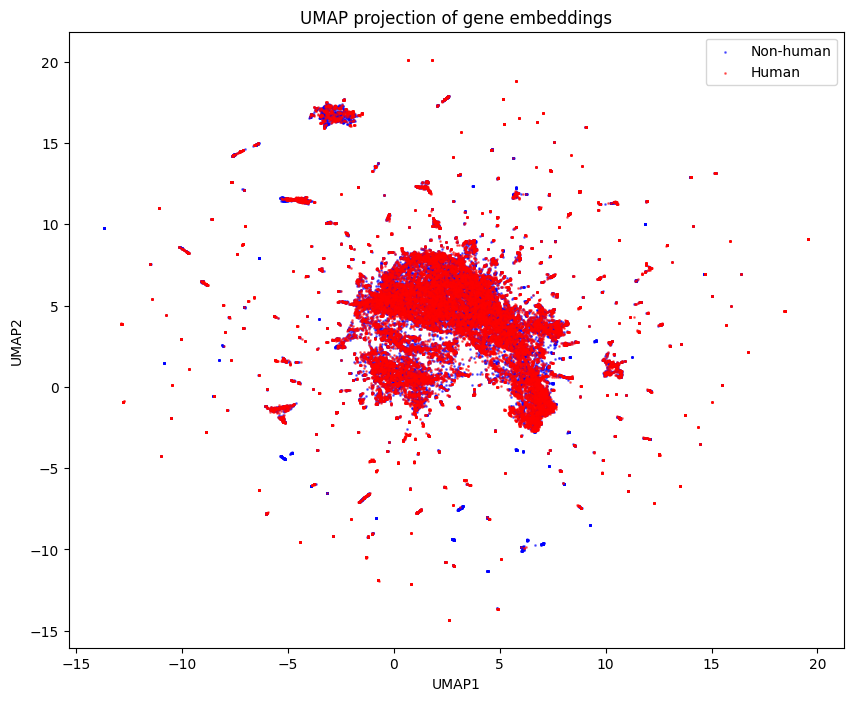

In [ ]:
# Plot the UMAP
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(
    umap_df.loc[~is_hum, "UMAP1"],
    umap_df.loc[~is_hum, "UMAP2"],
    alpha=0.5,
    s=1,
    label="Non-human",
    color="blue",
)
plt.scatter(
    umap_df.loc[is_hum, "UMAP1"],
    umap_df.loc[is_hum, "UMAP2"],
    alpha=0.5,
    s=1,
    label="Human",
    color="red",
)
plt.title("UMAP projection of gene embeddings")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


In [11]:
da = pd.read_parquet("../data/main/gene_embs/")

In [14]:
da

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
AT5G16970,-0.019923,0.007648,-0.009758,0.000047,-0.003294,-0.007664,0.012734,-0.007516,-0.001748,0.013502,-0.006194,-0.000378,0.008116,0.006863,-0.003693,0.014988,0.007794,-0.015325,-0.011156,-0.008715,-0.005369,0.001263,0.002951,0.022450,0.005938,0.007224,0.027993,0.000659,-0.004341,-0.002679,0.016059,-0.007980,-0.009780,-0.002924,0.013148,-0.014233,0.023541,-0.003219,0.007571,-0.016578,0.005862,0.005653,0.010486,0.016677,-0.000531,0.008045,0.008302,0.020115,-0.012058,-0.022292,-0.009399,0.029350,0.004927,-0.017564,0.002756,-0.008781,-0.020981,-0.005293,-0.000273,0.010783,0.001945,-0.008065,-0.004723,-0.001758,0.010081,-0.007528,0.023022,0.005819,-0.008885,0.012200,0.005081,-0.003374,0.002386,0.006041,0.005587,0.008925,-0.020716,0.010476,0.012867,0.003301,0.012737,0.004083,-0.001724,0.000626,0.011646,-0.005312,0.014025,0.006560,-0.026163,0.009418,-0.021593,-0.004416,0.002465,-0.014241,0.017977,0.035611,-0.002277,-0.032984,0.013508,0.000999,...,-0.004282,-0.004306,-0.006522,0.016270,0.006460,-0.014166,0.000428,0.004589,-0.006099,-0.020027,-0.016726,-0.000489,-0.011295,-0.011577,-0.010375,0.009976,-0.007374,0.008430,-0.000145,-0.001803,-0.003666,0.015686,0.014201,0.001622,0.011713,-0.002340,-0.014388,0.002862,0.009908,0.000955,0.014388,-0.018991,0.015981,0.004748,-0.007560,0.011719,0.014407,-0.020214,-0.006804,-0.398648,0.012793,0.008831,-0.003229,-0.006276,-0.017220,0.001136,0.003147,0.028339,0.010214,-0.023607,0.012877,-0.005262,0.011923,-0.026481,0.003506,-0.001810,0.001179,-0.007919,-0.014482,-0.002629,-0.000661,0.011607,0.008794,0.019346,0.008839,0.004565,-0.001898,-0.021899,-0.012780,-0.003981,0.009537,-0.005416,-0.015102,0.005048,0.001120,-0.010932,-0.002833,0.034445,-0.002980,-0.024357,-0.000298,-0.007914,0.011309,0.005006,0.020490,-0.014450,0.007969,0.011998,-0.014826,-0.008763,0.014331,-0.008176,0.004172,0.012905,-0.007998,0.014453,-0.004495,-0.006473,0.003368,0.006359
AT4G32100,-0.012441,0.022258,-0.017014,0.006066,-0.006865,-0.001185,0.012540,0.002592,-0.002843,-0.014760,-0.002463,0.013775,-0.010631,-0.008232,0.004675,0.003583,0.012166,-0.011629,-0.007708,-0.006645,-0.015754,-0.007890,-0.004023,0.015175,0.010425,0.000341,0.034449,-0.008588,0.014941,0.003408,0.013924,-0.006229,-0.008596,0.003815,-0.001886,0.009618,0.013569,-0.000772,-0.011720,-0.021360,0.001292,0.009261,-0.007231,0.008395,0.007217,0.015150,0.011256,-0.002757,-0.013840,-0.022335,-0.001577,0.015845,-0.000766,-0.013109,0.024092,-0.004971,-0.014604,-0.007471,0.013725,-0.013762,-0.000012,-0.003311,0.004814,0.000602,0.011314,-0.017700,0.001484,0.009256,-0.018373,0.000756,0.014623,-0.001199,0.012970,0.000320,0.008552,0.012686,-0.032904,0.014253,0.008759,0.002766,-0.015766,-0.000424,-0.019111,-0.009110,0.007422,-0.006211,0.007010,-0.001989,-0.019351,0.022227,0.000610,0.010563,-0.003864,-0.020729,0.002698,0.035719,-0.004080,-0.016917,0.035017,0.010324,...,-0.002678,-0.018954,0.001098,0.014231,0.019104,-0.020715,0.003266,0.002325,-0.011375,-0.016614,0.000947,-0.000872,-0.014104,-0.015436,-0.007309,0.002739,-0.001008,0.019735,0.005200,0.001620,-0.013441,0.003216,0.014243,0.003936,0.019802,0.022458,-0.007874,-0.002808,0.013934,0.011584,-0.014445,-0.018673,-0.009620,0.001745,-0.00564

In [12]:
is_hum = da.index.str.startswith("ENSG")

In [ ]:
import umap
import numpy as np

# Get the embedding matrix
X = da.values

# Initialize and fit UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

# Create a DataFrame with the UMAP coordinates
umap_df = pd.DataFrame(embedding, index=da.index, columns=["UMAP1", "UMAP2"])

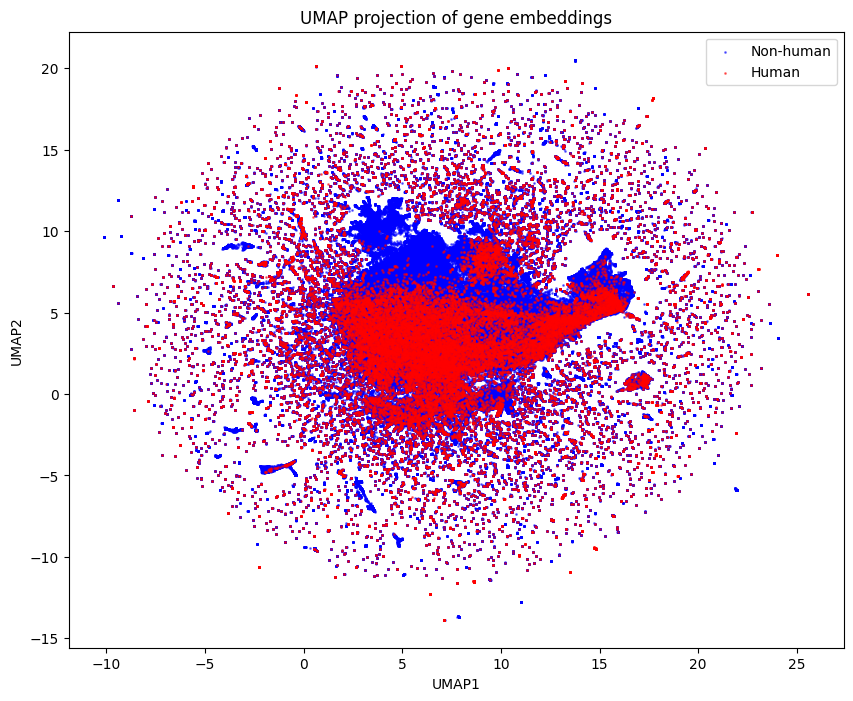

In [ ]:
# Plot the UMAP
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(
    umap_df.loc[~is_hum, "UMAP1"],
    umap_df.loc[~is_hum, "UMAP2"],
    alpha=0.5,
    s=1,
    label="Non-human",
    color="blue",
)
plt.scatter(
    umap_df.loc[is_hum, "UMAP1"],
    umap_df.loc[is_hum, "UMAP2"],
    alpha=0.5,
    s=1,
    label="Human",
    color="red",
)
plt.title("UMAP projection of gene embeddings")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


# generate gene location file 

In [6]:
from scdataloader.utils import getBiomartTable

In [ ]:
table = getBiomartTable(
    ensemble_server="http://jan2024.archive.ensembl.org/biomart",
    database="hsapiens_gene_ensembl",
    attributes=["start_position", "chromosome_name", "ensembl_gene_id"],
    bypass_attributes=True,
).set_index("ensembl_gene_id")  # mmusculus_gene_ensembl, hsapiens_gene_ensembl
table = table.loc[~table.index.duplicated(keep="first")]
table = table.sort_values(by=["chromosome_name", "start_position"])
table


downloading gene names from biomart
['start_position', 'chromosome_name', 'ensembl_gene_id']


,start_position,chromosome_name
ensembl_gene_id,,
ENSG00000290825,11869,1
ENSG00000223972,12010,1
ENSG00000227232,14696,1
ENSG00000278267,17369,1
ENSG00000243485,29554,1
...,...,...
ENSG00000292373,57184216,Y
ENSG00000292369,57190738,Y
ENSG00000292370,57201143,Y


In [8]:
from scdataloader import utils

In [9]:
a = utils.load_genes()

In [10]:
gene_position_tolerance = 10_000

In [ ]:
c = []
i = 0
prev_position = -100_000
prev_chromosome = None
for _, r in table.iterrows():
    if (
        r["chromosome_name"] != prev_chromosome
        or r["start_position"] - prev_position > gene_position_tolerance
    ):
        i += 1
    c.append(i)
    prev_position = r["start_position"]
    prev_chromosome = r["chromosome_name"]
print(f"reduced the size to {len(set(c)) / len(table)}")
table["pos"] = c

reduced the size to 0.6672370635403261


In [12]:
table

,start_position,chromosome_name,pos
ensembl_gene_id,,,
ENSG00000290825,11869,1,1
ENSG00000223972,12010,1,1
ENSG00000227232,14696,1,1
ENSG00000278267,17369,1,1
ENSG00000243485,29554,1,2
...,...,...,...
ENSG00000292373,57184216,Y,47180
ENSG00000292369,57190738,Y,47180
ENSG00000292370,57201143,Y,47181


In [ ]:
table2 = getBiomartTable(
    database="mmusculus_gene_ensembl", attributes=["start_position", "chromosome_name"]
).set_index("ensembl_gene_id")  # mmusculus_gene_ensembl, hsapiens_gene_ensembl
table2 = table2.loc[~table2.index.duplicated(keep="first")]
table2 = table2.sort_values(by=["chromosome_name", "start_position"])
table2

downloading gene names from biomart
['ensembl_gene_id', 'hgnc_symbol', 'gene_biotype', 'entrezgene_id', 'start_position', 'chromosome_name']


,hgnc_symbol,gene_biotype,entrezgene_id,start_position,chromosome_name
ensembl_gene_id,,,,,
ENSMUSG00000102693,ENSMUSG00000102693,TEC,NaN,3143476,1
ENSMUSG00000064842,ENSMUSG00000064842,snRNA,115487594.0,3172239,1
ENSMUSG00000051951,ENSMUSG00000051951,protein_coding,497097.0,3276124,1
ENSMUSG00000102851,ENSMUSG00000102851,processed_pseudogene,NaN,3322980,1
ENSMUSG00000103377,ENSMUSG00000103377,TEC,NaN,3435954,1
...,...,...,...,...,...
ENSMUSG00000099399,ENSMUSG00000099399,lncRNA,NaN,90676615,Y
ENSMUSG00000095366,ENSMUSG00000095366,lncRNA,NaN,90763696,Y
ENSMUSG00000095134,ENSMUSG00000095134,unprocessed_pseudogene,NaN,90764326,Y


In [ ]:
c = []
i = 0
prev_position = -100000
prev_chromosome = None
for _, r in table2.iterrows():
    if (
        r["chromosome_name"] != prev_chromosome
        or r["start_position"] - prev_position > gene_position_tolerance
    ):
        i += 1
    c.append(i)
    prev_position = r["start_position"]
    prev_chromosome = r["chromosome_name"]
print(f"reduced the size to {len(set(c)) / len(table2)}")
table2["pos"] = c

reduced the size to 0.7208162835215398



# solving a gene mapping issue that can arise

In [17]:
a = pd.read_parquet("../data/main/biomart_pos.parquet")

In [ ]:
l = [
    "ENSG00000112096",
    "ENSG00000137808",
    "ENSG00000161149",
    "ENSG00000182230",
    "ENSG00000203812",
    "ENSG00000204092",
    "ENSG00000205485",
    "ENSG00000212951",
    "ENSG00000215271",
    "ENSG00000221995",
    "ENSG00000224739",
    "ENSG00000224745",
    "ENSG00000225178",
    "ENSG00000225932",
    "ENSG00000226377",
    "ENSG00000226380",
    "ENSG00000226403",
    "ENSG00000227021",
    "ENSG00000227220",
    "ENSG00000227902",
    "ENSG00000228139",
    "ENSG00000228206",
    "ENSG00000228906",
    "ENSG00000229352",
    "ENSG00000231575",
    "ENSG00000232196",
    "ENSG00000232295",
    "ENSG00000233776",
    "ENSG00000236166",
    "ENSG00000236673",
    "ENSG00000236740",
    "ENSG00000236886",
    "ENSG00000236996",
    "ENSG00000237133",
    "ENSG00000237513",
    "ENSG00000237548",
    "ENSG00000237838",
    "ENSG00000239446",
    "ENSG00000239467",
    "ENSG00000239665",
    "ENSG00000244693",
    "ENSG00000244952",
    "ENSG00000249860",
    "ENSG00000251044",
    "ENSG00000253878",
    "ENSG00000254561",
    "ENSG00000254740",
    "ENSG00000255633",
    "ENSG00000255823",
    "ENSG00000256045",
    "ENSG00000256222",
    "ENSG00000256374",
    "ENSG00000256427",
    "ENSG00000256618",
    "ENSG00000256863",
    "ENSG00000256892",
    "ENSG00000258414",
    "ENSG00000258808",
    "ENSG00000258861",
    "ENSG00000259444",
    "ENSG00000259820",
    "ENSG00000259834",
    "ENSG00000259855",
    "ENSG00000260461",
    "ENSG00000261068",
    "ENSG00000261438",
    "ENSG00000261490",
    "ENSG00000261534",
    "ENSG00000261737",
    "ENSG00000261773",
    "ENSG00000261963",
    "ENSG00000262668",
    "ENSG00000263464",
    "ENSG00000267637",
    "ENSG00000268955",
    "ENSG00000269028",
    "ENSG00000269900",
    "ENSG00000269933",
    "ENSG00000269966",
    "ENSG00000270188",
    "ENSG00000270394",
    "ENSG00000270672",
    "ENSG00000271043",
    "ENSG00000271409",
    "ENSG00000271734",
    "ENSG00000271870",
    "ENSG00000272040",
    "ENSG00000272196",
    "ENSG00000272267",
    "ENSG00000272354",
    "ENSG00000272370",
    "ENSG00000272551",
    "ENSG00000272567",
    "ENSG00000272880",
    "ENSG00000272904",
    "ENSG00000272934",
    "ENSG00000273301",
    "ENSG00000273370",
    "ENSG00000273496",
    "ENSG00000273576",
    "ENSG00000273614",
    "ENSG00000273837",
    "ENSG00000273888",
    "ENSG00000273923",
    "ENSG00000276612",
    "ENSG00000276814",
    "ENSG00000277050",
    "ENSG00000277077",
    "ENSG00000277352",
    "ENSG00000277666",
    "ENSG00000277761",
    "ENSG00000278198",
    "ENSG00000278782",
    "ENSG00000278927",
    "ENSG00000278955",
    "ENSG00000279226",
    "ENSG00000279765",
    "ENSG00000279769",
    "ENSG00000279948",
    "ENSG00000280058",
    "ENSG00000280095",
    "ENSG00000280250",
    "ENSG00000280346",
    "ENSG00000280374",
    "ENSG00000280710",
    "ENSG00000282080",
    "ENSG00000282246",
    "ENSG00000282965",
    "ENSG00000283486",
    "ENSG00000284299",
    "ENSG00000284741",
    "ENSG00000285106",
    "ENSG00000285162",
    "ENSG00000285476",
    "ENSG00000285762",
    "ENSG00000286065",
    "ENSG00000286228",
    "ENSG00000286601",
    "ENSG00000286699",
    "ENSG00000286949",
    "ENSG00000286996",
    "ENSG00000287116",
    "ENSG00000287388",
    "ENSG00000288541",
    "ENSG00000288546",
    "ENSG00000288630",
    "ENSG00000288639",
    "ENSMUSG00000069518",
    "ENSMUSG00000073682",
    "ENSMUSG00000075014",
    "ENSMUSG00000075015",
    "ENSMUSG00000078091",
    "ENSMUSG00000094958",
    "ENSMUSG00000095547",
    "ENSMUSG00000095891",
    "ENSMUSG00000096385",
    "ENSMUSG00000096519",
    "ENSMUSG00000096923",
    "ENSMUSG00000097078",
]

In [22]:
a = a.reindex(a.index.tolist() + l)

In [23]:
a.to_parquet("../data/main/biomart_pos.parquet")

In [1]:
pd.concat([table, table2]).to_parquet("../data/main/biomart_pos.parquet")

NameError: name 'pd' is not defined

# populate ontology

In [ ]:
from scdataloader import utils

💡 connected lamindb: jkobject/scprint


In [ ]:
utils.populate_my_ontology(
    organisms=["NCBITaxon:10090", "NCBITaxon:9606"],
    sex=["PATO:0000384", "PATO:0000383"],
    celltypes=None,
    ethnicities=None,
    assays=None,
    tissues=None,
    diseases=None,
    dev_stages=None,
)

💡 returning existing Organism record with same name: 'unknown'


FieldError: Cannot resolve keyword 'source' into field. Choices are: _previous_runs, artifacts, cell_lines, cell_markers, cell_types, created_at, created_by, created_by_id, currently_used, dataframe_artifact, dataframe_artifact_id, description, developmental_stages, diseases, entity, ethnicities, experimental_factors, genes, id, in_db, md5, name, organism, organisms, pathways, phenotypes, proteins, run, run_id, source_website, tissues, uid, updated_at, url, version

# adding some

In [ ]:
emb, df = protein_embeddings_generator(
    organism="solanum_lycopersicum", cache=False, embedding_size=1152
)
emb.to_parquet("../data/main/gene_embs/solanum_emb.parquet")

In [ ]:
emb, df = protein_embeddings_generator(
    organism="equus_caballus", cache=False, embedding_size=1152
)
emb.to_parquet("../data/main/gene_embs/equus_emb.parquet")

14866  genes had duplicates
dropped 0 weird sequences
dropped 42 non-coding sequences


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

21426it [14:11, 25.18it/s]


: 

In [2]:
emb, df = protein_embeddings_generator(
    organism="felis_catus", cache=False, embedding_size=1152
)
emb.to_parquet("../data/main/gene_embs/catus_emb.parquet")

gzip: /tmp/data/fasta/Felis_catus.Felis_catus_9.0.pep.all.fa already exists;	not overwritten


9318  genes had duplicates
dropped 0 weird sequences
dropped 24 non-coding sequences


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

19564it [14:04, 23.16it/s]


In [3]:
emb, df = protein_embeddings_generator(
    organism="panthera_tigris_altaica", cache=False, embedding_size=1152
)
emb.to_parquet("../data/main/gene_embs/tigris_emb.parquet")

5984  genes had duplicates
dropped 0 weird sequences
dropped 0 non-coding sequences


17544it [12:10, 24.03it/s]
